Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

Reading the dataset from the directory

In [2]:
df=pd.read_csv("Facebook_Marketplace_data.csv")

In [3]:
df.shape

(7050, 16)

Checking for missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [25]:
df.isna().sum()

,0
status_id,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0
num_sads,0


So there are no missing values

Dropping the unnecessary columns

In [5]:
df.drop(['Column1', 'Column3','Column2','Column4'], axis=1,inplace=True)

convering the categorical column using one-hot encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder
df_pandas_encoded = pd.get_dummies(df, columns=['status_type'], drop_first=True)
encoder = OneHotEncoder(sparse_output=False)
hot_encoded=encoder.fit_transform(df[["status_type"]])
one_hot_df = pd.DataFrame(hot_encoded,
                          columns=encoder.get_feature_names_out(['status_type']))
df_sklearn_encoded = pd.concat([df.drop('status_type', axis=1), one_hot_df], axis=1)
print(df_sklearn_encoded)
df=df_sklearn_encoded

      status_id status_published  num_reactions  num_comments  num_shares  \
0             1   4/22/2018 6:00            529           512         262   
1             2  4/21/2018 22:45            150             0           0   
2             3   4/21/2018 6:17            227           236          57   
3             4   4/21/2018 2:29            111             0           0   
4             5   4/18/2018 3:22            213             0           0   
...         ...              ...            ...           ...         ...   
7045       7046   9/24/2016 2:58             89             0           0   
7046       7047  9/23/2016 11:19             16             0           0   
7047       7048  9/21/2016 23:03              2             0           0   
7048       7049   9/20/2016 0:43            351            12          22   
7049       7050  9/10/2016 10:30             17             0           0   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  \
0 

Extracting the hours part from the status_published column

In [7]:
date_time=pd.to_datetime(df["status_published"])
print(date_time)
df["hour"]=date_time.dt.hour

0      2018-04-22 06:00:00
1      2018-04-21 22:45:00
2      2018-04-21 06:17:00
3      2018-04-21 02:29:00
4      2018-04-18 03:22:00
               ...        
7045   2016-09-24 02:58:00
7046   2016-09-23 11:19:00
7047   2016-09-21 23:03:00
7048   2016-09-20 00:43:00
7049   2016-09-10 10:30:00
Name: status_published, Length: 7050, dtype: datetime64[ns]


In [8]:
df.columns

Index(['status_id', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'status_type_link', 'status_type_photo',
       'status_type_status', 'status_type_video', 'hour'],
      dtype='object')

Plotting bar graph between hours and number of reactions

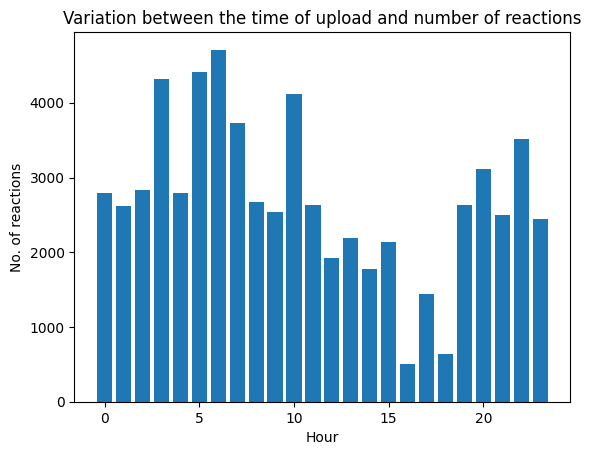

In [26]:
plt.bar(df["hour"],df["num_reactions"])
plt.xlabel("Hour")
plt.ylabel("No. of reactions")
plt.title("Variation between the time of upload and number of reactions")
plt.show()


Calculating the correlation

In [9]:
val=df["num_comments"].corr(df["num_reactions"])
print(val)

0.15084290344217643


In [10]:
val=df["num_shares"].corr(df["num_reactions"])
print(val)

0.250722516628319


Constructing the heat map

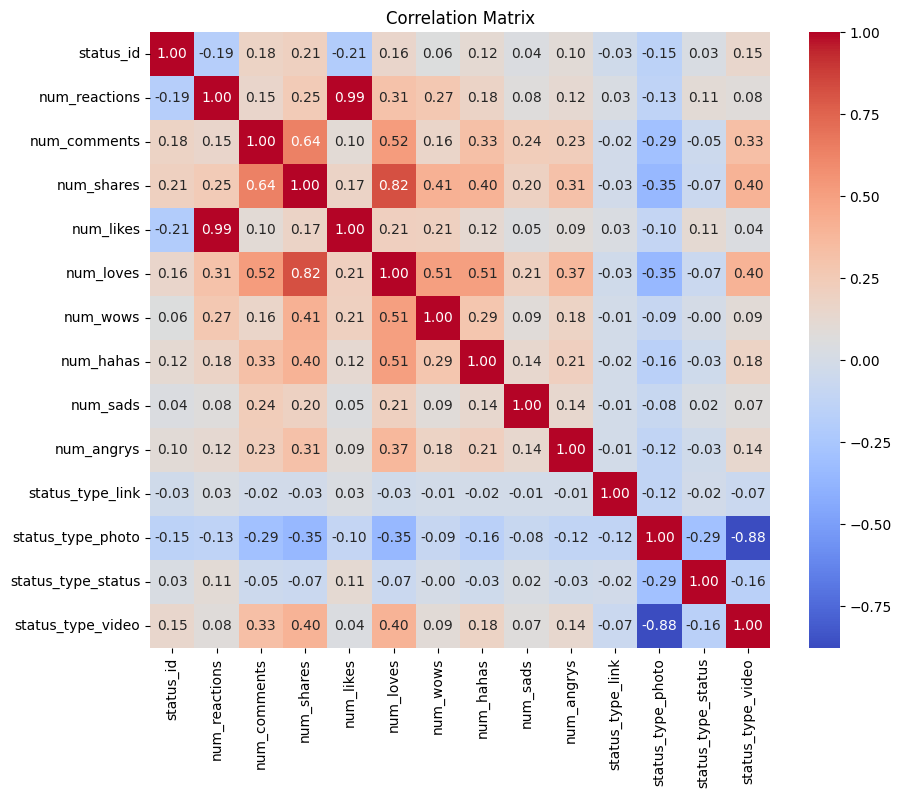

In [11]:
numeric_df=df.select_dtypes(include=['float64','int64'])
corr_matrix=numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Scatter plot to show the correlation

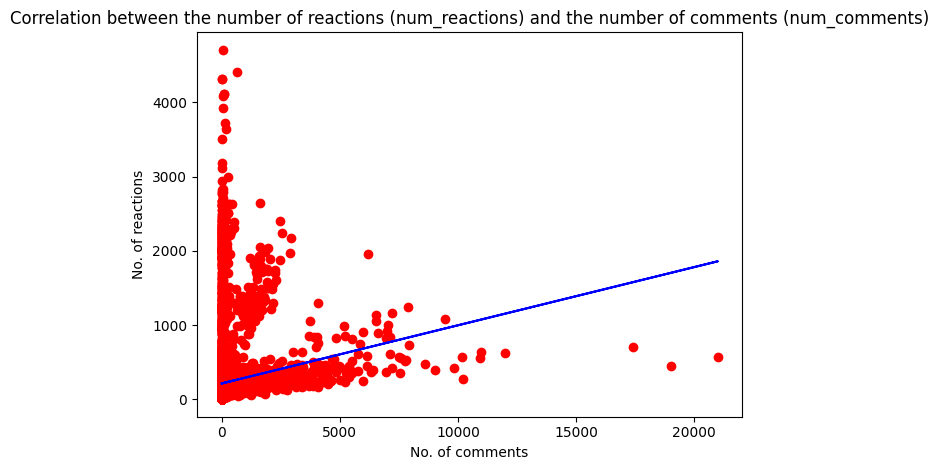

In [12]:
X=df["num_comments"]
Y=df["num_reactions"]
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X.values.reshape(-1, 1),Y)
plt.scatter(df["num_comments"],df["num_reactions"],color="red")
plt.plot(df["num_comments"],regressor.predict(X.values.reshape(-1, 1)),color="blue")
plt.title("Correlation between the number of reactions (num_reactions) and the number of comments (num_comments)")
plt.xlabel("No. of comments")
plt.ylabel("No. of reactions")
plt.tight_layout()
plt.show()

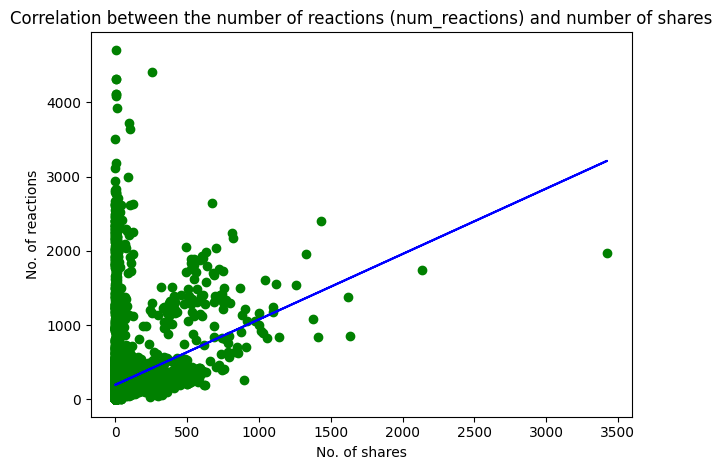

In [13]:
X=df["num_shares"]
Y=df["num_reactions"]
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X.values.reshape(-1, 1),Y)
plt.scatter(df["num_shares"],df["num_reactions"],color="green")
plt.plot(df["num_shares"],regressor.predict(X.values.reshape(-1, 1)),color="blue")
plt.title("Correlation between the number of reactions (num_reactions) and number of shares")
plt.ylabel("No. of reactions")
plt.xlabel("No. of shares")
plt.tight_layout()
plt.show()

extracting that part of the data which is required to train the k-means clustering

In [17]:
Y=df.iloc[:,2:16]
print(Y)

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529           512         262        432         92         3   
1               150             0           0        150          0         0   
2               227           236          57        204         21         1   
3               111             0           0        111          0         0   
4               213             0           0        204          9         0   
...             ...           ...         ...        ...        ...       ...   
7045             89             0           0         89          0         0   
7046             16             0           0         14          1         0   
7047              2             0           0          1          1         0   
7048            351            12          22        349          2         0   
7049             17             0           0         17          0         0   

      num_hahas  num_sads  

Elbow method

In [18]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(Y)
  wcss.append(kmeans.inertia_)

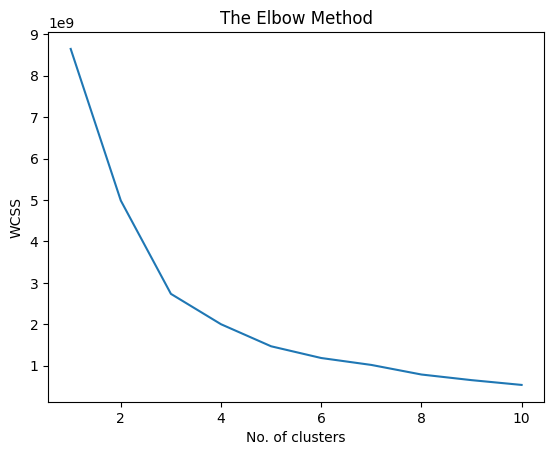

In [19]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method")
plt.show()

constructing the clusters graph

In [20]:
kmeans=KMeans(n_clusters=6,init="k-means++",random_state=42)
x_kmeans=kmeans.fit_predict(Y)

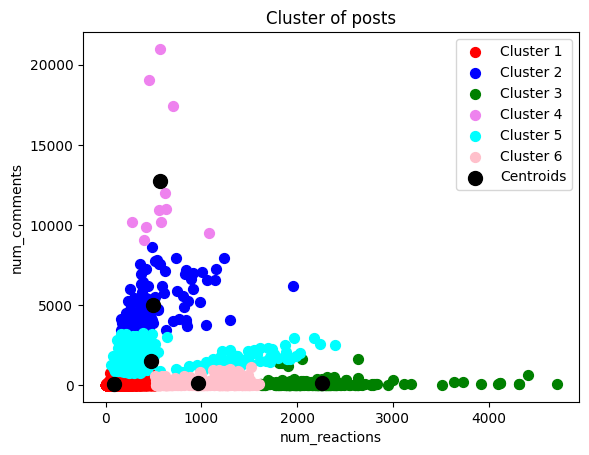

In [21]:
plt.scatter(Y.loc[x_kmeans==0, 'num_reactions'], Y.loc[x_kmeans==0, 'num_comments'], s=50, c='red', label='Cluster 1')
plt.scatter(Y.loc[x_kmeans==1, 'num_reactions'], Y.loc[x_kmeans==1, 'num_comments'], s=50, c='blue', label='Cluster 2')
plt.scatter(Y.loc[x_kmeans==2, 'num_reactions'], Y.loc[x_kmeans==2, 'num_comments'], s=50, c='green', label='Cluster 3')
plt.scatter(Y.loc[x_kmeans==3, 'num_reactions'], Y.loc[x_kmeans==3, 'num_comments'], s=50, c='violet', label='Cluster 4')
plt.scatter(Y.loc[x_kmeans==4, 'num_reactions'], Y.loc[x_kmeans==4, 'num_comments'], s=50, c='cyan', label='Cluster 5')
plt.scatter(Y.loc[x_kmeans==5, 'num_reactions'], Y.loc[x_kmeans==5, 'num_comments'], s=50, c='pink', label='Cluster 6')
#cluster_centres

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100 , c = 'black', label = 'Centroids')
plt.title("Cluster of posts")
plt.xlabel("num_reactions")
plt.ylabel("num_comments")
plt.legend()
plt.show()

counting the number of different type of posts

In [24]:
df["status_type_photo"].value_counts()
df["status_type_video"].value_counts()


,count
status_type_video,
0.0,4716
1.0,2334


In [27]:
df["status_type_link"].value_counts()
df["status_type_status"].value_counts()

,count
status_type_status,
0.0,6685
1.0,365


calculating the average comments,shares etc. of each post type

In [30]:
mean_ph=df[df["status_type_photo"]==1]["num_comments"].mean()
mean_vd=df[df["status_type_video"]==1]["num_comments"].mean()
mean_lk=df[df["status_type_link"]==1]["num_comments"].mean()
mean_st=df[df["status_type_status"]==1]["num_comments"].mean()
print("NUM_COMMENTS--")
print("Average of type photo:",mean_ph)
print("Average of type video:",mean_vd)
print("Average of type link:",mean_lk)
print("Average of type status:",mean_st)


NUM_COMMENTS--
Average of type photo: 15.993470149253731
Average of type video: 642.478149100257
Average of type link: 5.698412698412699
Average of type status: 36.23835616438356


In [29]:
mean_ph=df[df["status_type_photo"]==1]["num_shares"].mean()
mean_vd=df[df["status_type_video"]==1]["num_shares"].mean()
mean_lk=df[df["status_type_link"]==1]["num_shares"].mean()
mean_st=df[df["status_type_status"]==1]["num_shares"].mean()
print("NUM_SHARES--")
print("Average of type photos:",mean_ph)
print("Average of type videos:",mean_vd)
print("Average of type links:",mean_lk)
print("Average of type status:",mean_st)



NUM_SHARES--
Average of type photos: 2.5538712686567164
Average of type videos: 115.67994858611826
Average of type links: 4.396825396825397
Average of type status: 2.558904109589041


In [28]:
mean_ph=df[df["status_type_photo"]==1]["num_reactions"].mean()
mean_vd=df[df["status_type_video"]==1]["num_reactions"].mean()
mean_lk=df[df["status_type_link"]==1]["num_reactions"].mean()
mean_st=df[df["status_type_status"]==1]["num_reactions"].mean()
print("NUM_REACTIONS--")
print("Average of type photo:",mean_ph)
print("Average of type video:",mean_vd)
print("Average of type link:",mean_lk)
print("Average of type status:",mean_st)


NUM_REACTIONS--
Average of type photo: 181.29034514925374
Average of type video: 283.4095972579263
Average of type link: 370.14285714285717
Average of type status: 438.78356164383564
